In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta, binom
import warnings
warnings.filterwarnings("ignore")

## 推定パラメータ

In [19]:
true_p = 0.8
sample_size = 100

### 乱数

In [20]:
data = binom.rvs(1, true_p, size=sample_size)  # 成功確率true_pで1回試行をsample_size回繰り返す

In [21]:
a, b = 1, 1

In [22]:
# 更新ごとのパラメータを保存するリスト
a_values = [a]
b_values = [b]

In [23]:
# ベイズ更新
for outcome in data:
    if outcome == 1:  # 成功の場合、a を増加
        a += 1
    else:  
        b += 1 # 失敗の場合、b を増加
    a_values.append(a)
    b_values.append(b)

観測データ: [1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1
 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0]


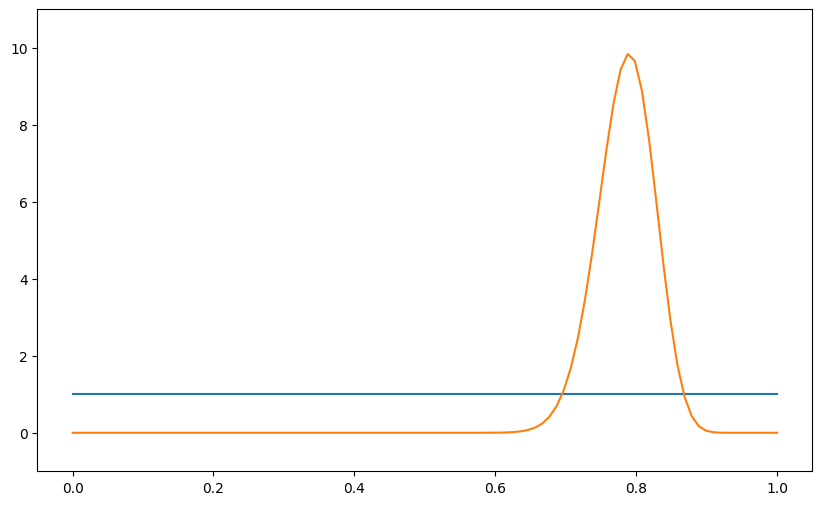

In [24]:
plt.figure(figsize=(10, 6))

# 結果のプロット
x = np.linspace(0, 1, 100)


i = 0
y = beta.pdf(x, a_values[i], b_values[i])
plt.plot(x, y, label=f'更新 {i}')

i = -1
y = beta.pdf(x, a_values[i], b_values[i])
plt.plot(x, y, label=f'更新 {i}')


plt.ylim(-1, 11)  # Y軸の範囲を-1から11に設定

# plt.legend()
# plt.show()
# 
plt.savefig("update.png")

# 観測データの確認
print("観測データ:", data)

## ミス推定

In [13]:
sum(data)

np.int64(77)

In [14]:
a, b = 15, 50

In [15]:
a_values = [a]
b_values = [b]
# ベイズ更新
for outcome in data:
    if outcome == 1:  # 成功の場合、a を増加
        a += 1
    else:  
        b += 1 # 失敗の場合、b を増加
    a_values.append(a)
    b_values.append(b)

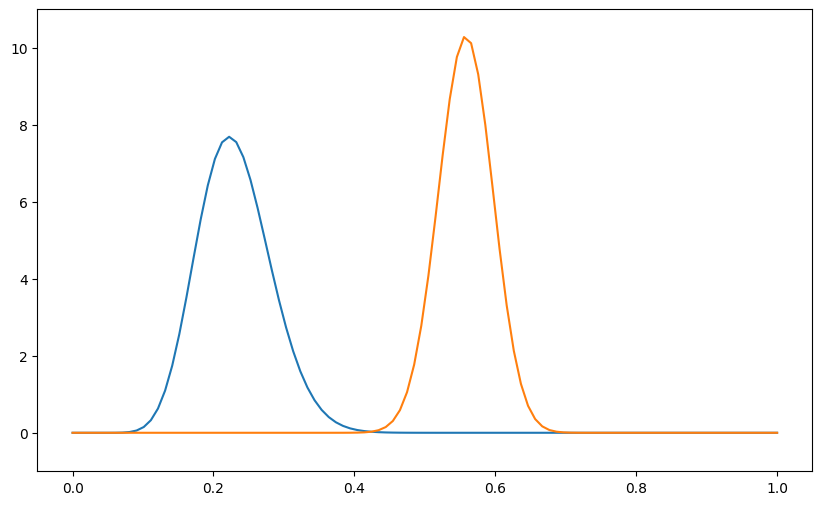

観測データ: [0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1
 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1
 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1]


In [16]:
plt.figure(figsize=(10, 6))

# 結果のプロット
x = np.linspace(0, 1, 100)


i = 0
y = beta.pdf(x, a_values[i], b_values[i])
plt.plot(x, y, label=f'更新 {i}')

i = -1
y = beta.pdf(x, a_values[i], b_values[i])
plt.plot(x, y, label=f'更新 {i}')


plt.ylim(-1, 11)  # Y軸の範囲を-1から11に設定

# plt.legend()
plt.show()

# 観測データの確認
print("観測データ:", data)

## 目的
GUIDEデータセットには大量のデータがあるが、使用困難なデータもあると思われる。  


In [2]:
train_path =  "/home/work/dataset/guide/GUIDE_Train.csv"
test_path = "/home/work/dataset/guide/GUIDE_Test.csv"

train_df = pl.read_csv(train_path)
test_df = pl.read_csv(test_path)

In [5]:
n_train = train_df.n_unique(subset = ["OrgId", "IncidentId"])
n_test = test_df.n_unique(subset = ["OrgId", "IncidentId"])
print(f"train: {n_train}")
print(f"test: {n_test}")

train: 730778
test: 303220


In [6]:
d_train_df = train_df.drop_nulls(subset=["MitreTechniques"])
d_test_df = test_df.drop_nulls(subset=["MitreTechniques"])

n_train = d_train_df.n_unique(subset = ["OrgId", "IncidentId"])
n_test = d_test_df.n_unique(subset = ["OrgId", "IncidentId"])
print(f"train: {n_train}")
print(f"test: {n_test}")

train: 251494
test: 107018


In [7]:
train_df.head()

Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,ActionGrouped,ActionGranular,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,EmailClusterId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,ThreatFamily,FileName,FolderPath,ResourceIdName,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City
i64,i64,i64,i64,str,i64,i64,str,str,str,str,str,str,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,f64,i64,i64,i64,i64,i64,i64,str,i64,i64,i64,str,str,i64,i64,str,str,str,i64,i64,i64
180388628218,0,612,123247,"""2024-06-04T06:05:15.000Z""",7,6,"""InitialAccess""",null,"""TruePositive""",null,null,"""Ip""","""Related""",98799,138268,27,160396,441377,673934,425863,453297,153085,529644,null,1631,635,860,2251,3421,881,null,289573,117668,3586,null,null,5,66,null,null,null,31,6,3
455266534868,88,326,210035,"""2024-06-14T03:01:25.000Z""",58,43,"""Exfiltration""",null,"""FalsePositive""",null,null,"""User""","""Impacted""",98799,138268,360606,160396,22406,23032,22795,24887,153085,529644,null,1631,635,860,2251,3421,881,null,289573,117668,3586,null,null,5,66,null,null,null,242,1445,10630
1056561957389,809,58352,712507,"""2024-06-13T04:52:55.000Z""",423,298,"""InitialAccess""","""T1189""","""FalsePositive""",null,null,"""Url""","""Related""",98799,138268,360606,68652,441377,673934,425863,453297,153085,529644,null,1631,635,860,2251,3421,881,null,289573,117668,3586,null,null,5,66,null,"""Suspicious""","""Suspicious""",242,1445,10630
1279900258736,92,32992,774301,"""2024-06-10T16:39:36.000Z""",2,2,"""CommandAndControl""",null,"""BenignPositive""",null,null,"""Url""","""Related""",98799,138268,360606,13,441377,673934,425863,453297,153085,529644,null,1631,635,860,2251,3421,881,null,289573,117668,3586,null,null,5,66,null,"""Suspicious""","""Suspicious""",242,1445,10630
214748368522,148,4359,188041,"""2024-06-15T01:08:07.000Z""",9,74,"""Execution""",null,"""TruePositive""",null,null,"""User""","""Impacted""",98799,138268,360606,160396,449,592,440,479,153085,529644,null,1631,635,860,2251,3421,881,null,289573,117668,3586,null,null,5,66,null,null,null,242,1445,10630


In [10]:
t_d_train_df = d_train_df.filter(pl.col("IncidentGrade") == "TruePositive")
t_d_test_df = d_test_df.filter(pl.col("IncidentGrade") == "TruePositive")

n_train = t_d_train_df.n_unique(subset = ["OrgId", "IncidentId"])
n_test = t_d_test_df.n_unique(subset = ["OrgId", "IncidentId"])
print(f"train: {n_train}")
print(f"test: {n_test}")

train: 45535
test: 19613
